### Importation des librairies

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

### Chargement du dataset (digits)
* Le jeu de donnée digits se compose d'images de chiffres de 8x8 pixels. L'attribut images de l'ensemble de données stocke des tableaux 8x8 de valeurs de niveaux de gris pour chaque image. Nous allons utiliser ces tableaux pour visualiser les 4 premières images. L'attribut target de l'ensemble de données stocke le chiffre que chaque image représente.
* Ici on a un problème de classification dont le nombre de classe est 10 c'est à dire de (0, 1, 2, 3, 4, 5, 6, 7, 8, 9).
* s'il y'a une différence entre ce dataset et ce qu'on a déjà vu, c'est que ce dataset est inclus dans sklearn et pretraité à l'appui.

In [3]:
# Chargement du dataset digits
digits = datasets.load_digits()
# digits

### Exploration et pretraitement du jeu de donnée

In [4]:
# Affichage de tous les attributs de digits
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
# Affichage du contenu de digits non encodé
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [6]:
# Affichage du contenu de digits encodé
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
# Affichage de l'étiquette des catégories
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [8]:
# Affichage du dataframe digits (par defaut type de retour c'est none)
digits.frame

In [9]:
# Affichage des images encodées
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [10]:
# Affichage de la cible (ce qu'on souhaite predire)
len(digits.target)

1797

In [11]:
# l'etiquette de la cible
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

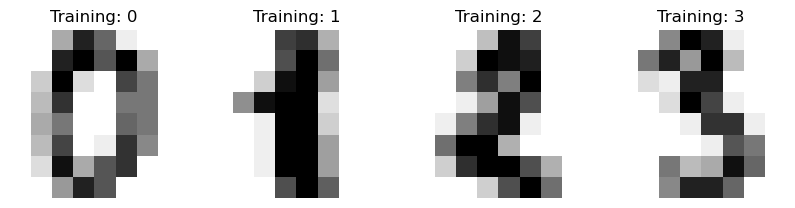

In [12]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3)) # Subplots retourne deux valeurs une pour axes et l'autre pour (_)
for ax, image, label in zip(axes, digits.images, digits.target): # zip crée un tuple associant chaque image à un axe et à son label
    ax.set_axis_off() # Ne pas afficher le cadre
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") # Affichage de l'image
    ax.set_title("Training: %i" % label) # Affichage du titre

In [13]:
digits.images.shape

(1797, 8, 8)

In [14]:
# Affichage du premier élément du tableau images encodés
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
digits.images.max()

16.0

In [16]:
digits.images.min()

0.0

In [17]:
digits.data.shape

(1797, 64)

### Model

* Création et selection du model en fixant l'hyperparamètre gamma

In [18]:
n_samples = len(digits.images) # Renvoie la taille de la matrice digits.images
data = digits.images.reshape((n_samples, -1)) # Donne une nouvelle forme à un tableau sans modifier ses données.

clf = svm.SVC(gamma=0.001)

* Répartition des données en sous-ensembles 50 % d'entraînement et 50 % de test

In [19]:
# shuffle indique s'il faut ou non mélanger les données avant de les diviser
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True 
)

* Entrainement du model sur l'ensemble d'entrainement

In [20]:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

* Etape d'inférence et Evaluation du model

In [21]:
clf.score(X_test, y_test)

0.9911012235817576

* Prediction du model sur l'ensemble de test

In [22]:
predicted = clf.predict(X_test)

* Visualisation des 4 premiers échantillons de test en montrant leur valeur numérique prédite dans le titre.

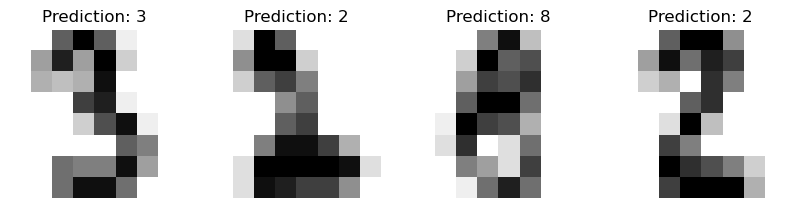

In [23]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8) # donne une forme matrice à image de 8 lignes, 8 colonnes
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

* construction du rapport texte montrant les principales métriques de classification.

In [24]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.99      1.00      0.99        87
           2       1.00      1.00      1.00        98
           3       0.99      1.00      0.99        82
           4       1.00      1.00      1.00        85
           5       0.98      0.99      0.98        88
           6       0.99      1.00      1.00       100
           7       1.00      0.99      0.99        84
           8       0.99      0.97      0.98        98
           9       0.98      0.97      0.97        91

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899




* Matrice de confusion des vraies valeurs numériques et des valeurs numériques prédites.

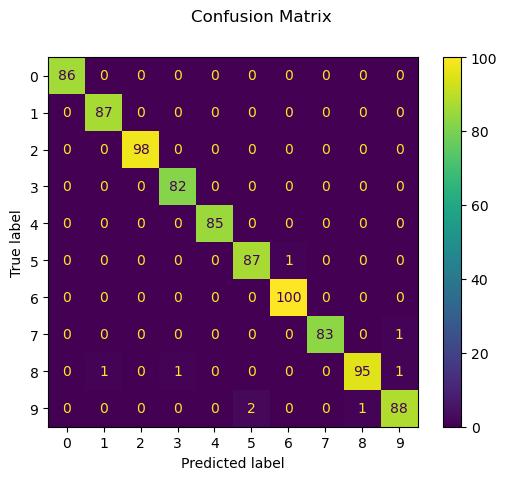

In [25]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
disp.confusion_matrix

plt.show()

- On voit que quand la valeur de gamma est superieur ou même inferieur à 0,001 le model à une précision faible donc cala veut dire que l'hyperparamètre gamma à 0.001 nous permet dobtenir le model optimal.
- Voici quelques captures d'ecran avec les modification de la valeur de gamma qui explique la différence entre les différents metrics.

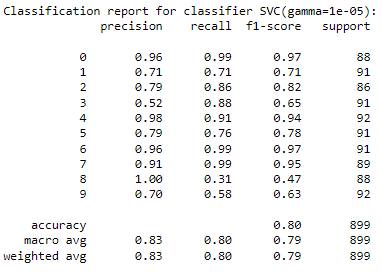

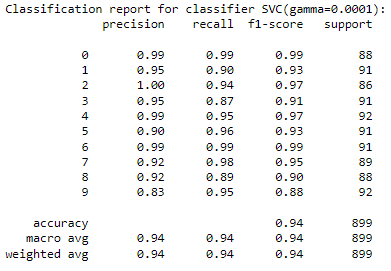

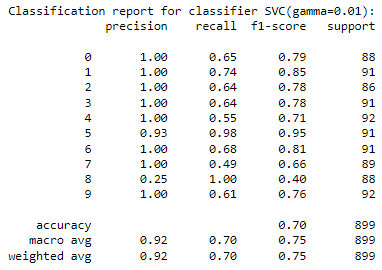

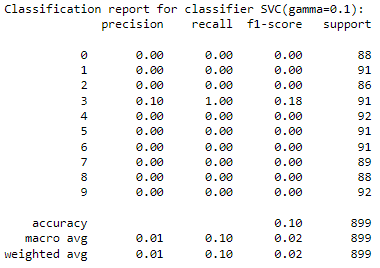